In [1]:
#% matplotlib inline
import matplotlib
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.utils.io_utils import HDF5Matrix
import numpy as np
from keras.preprocessing import image

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Activation, Input
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16, VGG19, InceptionV3
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
import tensorflow as tf
tf.VERSION

'1.14.0'

In [3]:
models_filename = 'v8_vgg16_model_1.h5'
image_dir = 'food-101/images'
image_size = (224, 224)
batch_size = 16
epochs = 80

In [4]:
# 5gb of images won't fit in my memory. use datagenerator to go across all images.
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = False,fill_mode = "nearest",zoom_range = 0,
                                   width_shift_range = 0,height_shift_range=0,rotation_range=0)

train_generator = train_datagen.flow_from_directory(image_dir,target_size = (image_size[0], image_size[1]),
                                                    batch_size = batch_size, class_mode = "categorical")

num_of_classes = len(train_generator.class_indices)

Found 101000 images belonging to 101 classes.


In [5]:
train_generator

In [5]:
model = VGG16(weights=None, include_top=False, input_shape=(image_size[0], image_size[1], 3))

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(101*2, activation="relu")(x)
x = Dense(101*2, activation="relu")(x)
predictions = Dense(101, activation="softmax")(x)
model_final = Model(input=model.input, output=predictions)
model_final.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_final.load_weights(models_filename)

W0323 16:50:06.786858 17996 deprecation_wrapper.py:119] From c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0323 16:50:06.840323 17996 deprecation_wrapper.py:119] From c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0323 16:50:06.858540 17996 deprecation_wrapper.py:119] From c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0323 16:50:06.940314 17996 deprecation_wrapper.py:119] From c:\users\14088\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

In [66]:
model = VGG16(weights='imagenet', include_top=True)


Found 13 images belonging to 1 classes.
['cake\\149797.jpg', 'cake\\293607.jpg', 'cake\\53320.jpg', 'cake\\biryani.jpeg', 'cake\\cake.jpeg', 'cake\\cake2.jpg', 'cake\\cake3.jpg', 'cake\\cake4.jpeg', 'cake\\chicken_fried_rice.jpeg', 'cake\\corn_wada.jpeg', 'cake\\french_fries.jpeg', 'cake\\french_fries2.jpeg', 'cake\\waffle.jpeg']
cake\french_fries.jpeg
[14.702502, 15.327096, 15.607615, 13.423567, 16.177307, 13.976894, 14.496582, 13.303065, 14.076765, 13.954972, 0.0, 10.64409, 13.762955]
[10, 11, 7, 3, 12, 9, 5, 8, 6, 0, 1, 2, 4]
cake\french_fries.jpeg
cake\french_fries2.jpeg
cake\cake4.jpeg
cake\biryani.jpeg
cake\waffle.jpeg
cake\corn_wada.jpeg
cake\cake2.jpg
cake\chicken_fried_rice.jpeg
cake\cake3.jpg
cake\149797.jpg
cake\293607.jpg
cake\53320.jpg
cake\cake.jpeg


'\na = features[0]\nb = features[1]\nprint(a)\nprint(b)\nimport numpy as np\ndist = np.linalg.norm(a-b)\nprint(dist)\n\nfrom scipy.spatial import distance\ndst = distance.euclidean(a, b)\nprint(dst)\n'

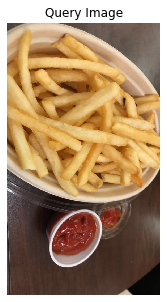

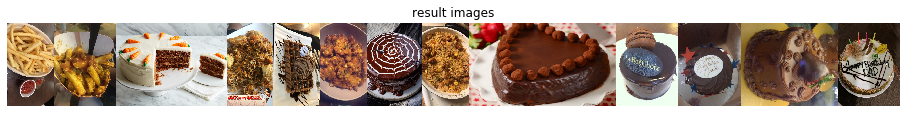

In [110]:
#from keras.preprocessing import image
#from keras.applications.imagenet_utils import preprocess_input as preprocess_input_vgg
'''
def get_image_vgg(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])#(image_size[0], image_size[1], 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_vgg(x)
    return img, x
'''

feat_extractor = Model(input=model.input, output=model.get_layer("fc2").output)

train_generator2 = train_datagen.flow_from_directory('test/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle= True)
features = []
file_names = train_generator2.filenames
print(file_names)

for n in range(len(file_names)):
    next_img = train_generator2.next()
    img, classifier = (next_img[0][0],next_img[1][0])
    feat = feat_extractor.predict(np.asarray([img]))[0]
    features.append(feat)

inp = 10
query = features[inp]
print(file_names[inp])

distances = []
for i in range(len(features)):
    distances.append(np.linalg.norm(query-features[i]))

print(distances)
dist_indices = sorted(range(len(distances)), key=lambda k: distances[k])
print(dist_indices)
for i in dist_indices:
    print(file_names[i])

#classifier1, image1 = get_image_vgg("test/cake/cake.jpeg")
#classifier2, image2 = get_image_vgg("test/cake/french_fries.jpeg")
#a = feat_extractor.predict(np.asarray([image1]))[0]
#b = feat_extractor.predict(np.asarray([image2]))[0]
'''
matplotlib.pyplot.figure(figsize=(16,4))
matplotlib.pyplot.plot(features[0])
matplotlib.pyplot.show()

matplotlib.pyplot.figure(figsize=(16,4))
matplotlib.pyplot.plot(features[1])
matplotlib.pyplot.show()
'''

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img("test/"+file_names[idx]) #+file_names[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

query_image = image.load_img("test/" + file_names[inp])
results_image = get_concatenated_images(dist_indices, 400)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(query_image)
matplotlib.pyplot.title("Query Image");

#image.load_img(file_names[0])

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
plt.axis('off')
plt.imshow(results_image)
matplotlib.pyplot.title("result images");


#print(len(features[0][0]))
'''
a = features[0]
b = features[1]
print(a)
print(b)
import numpy as np
dist = np.linalg.norm(a-b)
print(dist)

from scipy.spatial import distance
dst = distance.euclidean(a, b)
print(dst)
'''

In [1]:
distances

NameError: name 'distances' is not defined

In [14]:
preds = model_final.evaluate_generator(train_generator, steps=1, workers=8, use_multiprocessing=False)

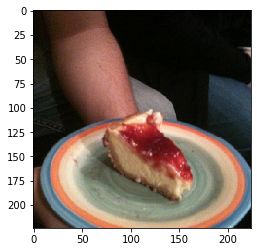

Actual:  cheesecake
Prediction: cheesecake


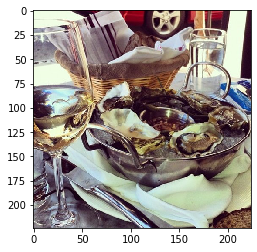

Actual:  oysters
Prediction: oysters


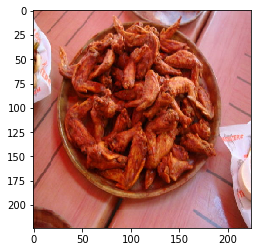

Actual:  chicken_wings
Prediction: chicken_wings


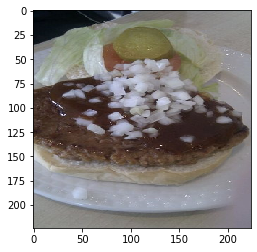

Actual:  hamburger
Prediction: hot_dog


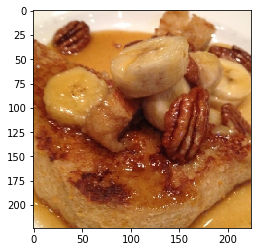

Actual:  french_toast
Prediction: french_toast


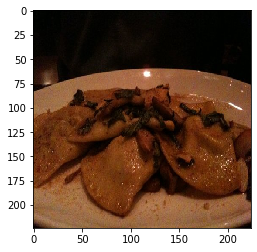

Actual:  ravioli
Prediction: ravioli


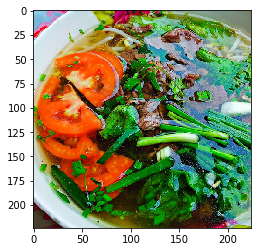

Actual:  pho
Prediction: pho


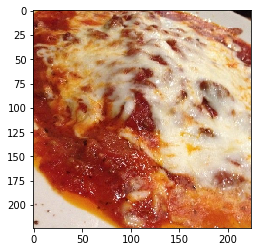

Actual:  lasagna
Prediction: lasagna


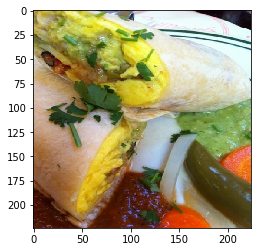

Actual:  breakfast_burrito
Prediction: breakfast_burrito


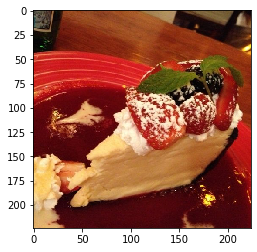

Actual:  cheesecake
Prediction: cheesecake


In [60]:
# routine for human evaluation - use the generator so we can see how well it can predict
for n in range(100):
    _ = train_generator.next()
    image, classifier = (_[0][0],_[1][0]) # take the first image from the batch
    index = np.argmax(classifier)
    answer = list(train_generator.class_indices.keys())[index]
    predicted = model_final.predict(np.asarray([image]))
    predicted_answer_index = np.argmax(predicted[0])
    predicted_answer = list(train_generator.class_indices.keys())[predicted_answer_index]

    plt.imshow(image)
    plt.show()

    print('Actual: ', answer)
    print('Prediction:', predicted_answer)

In [6]:
_ = train_generator.next()
image, classifier = (_[0][0],_[1][0])
print(image.shape)

(224, 224, 3)


(224, 224, 3)


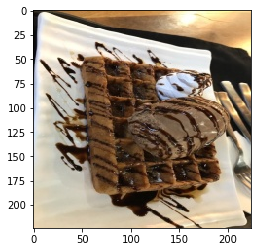

In [18]:
import cv2
img = cv2.imread('test/cake/waffle.jpeg')  
  
# Output img with window name as 'image' 
cv2.imshow('image', img)  
#cv2.waitkey(0)
cv2.imwrite('sample.jpeg', img)

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
img = cv2.imread('sample.jpeg')  
img=cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
cv2.imwrite('sample2.jpeg', img)

# Read Images 
img = mpimg.imread('sample2.jpeg') 
print(img.shape)
# Output Images 
plt.imshow(img)


In [76]:
#import cv2 

# Save image in set directory 
# Read RGB image 
#img = cv2.imread('test/cake.jpeg')  
#print(img)

train_generator2 = train_datagen.flow_from_directory('test/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle = True)
actuals = train_generator2.filenames
for i in range(5):
    _ = train_generator2.next()
    image, classifier = (_[0][0],_[1][0])
    #print(classifier)
    predicted = model_final.predict(np.asarray([image]))
    predicted_answer_index = np.argmax(predicted[0])
    predicted_answer = list(train_generator.class_indices.keys())[predicted_answer_index]

    print('Actual:',actuals[i].split('\\')[0], ', Prediction:', predicted_answer)

Found 2 images belonging to 1 classes.
Actual: cake , Prediction: french_fries
Actual: cake , Prediction: chocolate_cake


IndexError: list index out of range